# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

In [7]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [97]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#consider try result."salary":
            #except:
            #pass

In [9]:
df = pd.read_csv('/Users/lesliepham/Desktop/DSI_SM_01/projects/01-projects-weekly/project-04/assets/indeed-scraped-job-postings.csv')

In [10]:
r = requests.get(URL)
bs = BeautifulSoup(r.content, "lxml")
bs.select("h1")
print bs.prettify()

## YOUR CODE HERE

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <!-- pll -->
  <script src="/s/4a89ac5/en_US.js" type="text/javascript">
  </script>
  <link href="/s/a6a334e/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&amp;l=New+York" rel="alternate" title="Data Scientist $20,000 Jobs, Employment in New York State" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+scientist+%2420%2C000&amp;l=New+York" media="handheld" rel="alternate"/>
  <script type="text/javascript">
   window['closureReadyCallbacks'] = [];

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
  </script>
  <script src="/s/0579f05/jobsearch-all-compiled.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   var pingUrlsForGA = [];

v

In [11]:
company = bs.select('span.company')
company[3].text.strip()

u'Tapad'

In [12]:
location = bs.select('span.location')
location[4].text.strip()


u'New York, NY'

In [13]:
salary = bs.select('nobr')
salary

[<nobr><b>relevance</b> -\n            <a href="/jobs?q=data+scientist+%2420%2C000&amp;l=New+York&amp;sort=date" rel="nofollow">date</a></nobr>,
 <nobr>About</nobr>]

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above

In [62]:
results = bs.findAll('div',{"class" : "sjcl"})
results
listname = {}
for i in results[:10]:
    print i.text



    AbilTo, Inc

 - New York, NY




    Uber

 - 
4.0164 reviews
 - New York, NY




    Chegg

 - 
3.324 reviews
 - New York, NY



    Lancer Insurance Company

 - Long Beach, NY




    UncommonGoods

 - 
5.04 reviews
 - New York, NY



In [ ]:
#def extract_text(el):
#    if el:
#        return el.text.strip()
#    else:
#        return ''
    
#def get_company_from_result(result):
#    return extract_text(result.find('span', {'class' : 'company'}))

In [111]:
#print get_company_from_result(result)

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [4]:
#YOUR_CITY = 'Los Angeles'

In [5]:
#url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
#max_results_per_city = 100

#results = []

#for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', YOUR_CITY]):
#    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        # Append to the full set of results
#        pass

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [66]:
## YOUR CODE HERE

Lastly, we need to clean up salary data. 
1. Some of the salaries are not yearly but hourly, these will be useful to us for now
2. The salaries are given as text and usually with ranges.

#### Filter out the salaries that are not yearly (filter those that refer to hour)

In [67]:
## YOUR CODE HERE

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

### Save your results as a CSV

In [69]:
#.to_csv

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [36]:
df = df.dropna()
df = df.drop_duplicates()

print 'Shape:', df.shape
print 'Types:', df.dtypes
df['title'].astype(str)

Shape: (223, 8)
Types: city              object
company           object
salary            object
summary           object
title             object
parsed_salary    float64
yearly_salary    float64
high_salary         bool
dtype: object


0                                          Data Scientist
1                                   Senior Data Scientist
2                               Full-Stack Data Scientist
3                                          Data Scientist
4                                          Data Scientist
5                                     VP of Data Services
6                                    Fraud Data Scientist
7                                   Senior Data Scientist
8                                   Senior Data Scientist
10                    Python Developer (Machine Learning)
11                          Staff Research Associate, PMB
12      Chief Algorithm Developer (Signal Processing) ...
14      Post-Doctoral Scholar-Employee: Analysis of om...
15                               Principal Data Scientist
17                          Data Scientist (Econometrics)
18                  Data Scientist (Statistics/Economics)
19                      Data Scientist (Machine Learning)
20            

In [29]:
df.head(25)

,city,company,salary,summary,title,parsed_salary,yearly_salary,high_salary
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000.0,180000.0,True
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000.0,155000.0,True
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000.0,100000.0,True
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000.0,165000.0,True
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000.0,140000.0,True
5,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000.0,300000.0,True
6,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000.0,125000.0,True
7,San+Francisco,Brilent,"$130,000 a year","Perform large-scale data analysis, find intere...",Senior Data Scientist,130000.0,130000.0,True
8,San+Francisco,HSF Consulting,"$160,000 a year",More data- they simply have more data than the...,Senior Data Scientist,160000.0,160000.0,True
9,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000.0,125000.0,True


In [30]:
yearly = []
for i in df['parsed_salary']:
    if i < 20000.0:
        yearly.append(i*12)
    else:
        yearly.append(i)
df['yearly_salary'] = yearly

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [32]:
df['yearly_salary'].median()

85000.0

In [33]:
def binary_salary(x):
    if x >= 85000.0:
        return True
    else:
        return False
    
df['high_salary'] = df['yearly_salary'].map(binary_salary)

In [68]:
df = df.join(pd.get_dummies(df['city']))


ValueError: columns overlap but no suffix specified: Index([u'Austin', u'Chicago', u'New+York', u'San+Francisco', u'Seattle'], dtype='object')

In [69]:
df.head()

,city,company,salary,summary,title,parsed_salary,yearly_salary,high_salary,Austin,Chicago,New+York,San+Francisco,Seattle
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000.0,180000.0,True,0.0,0.0,0.0,1.0,0.0
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000.0,155000.0,True,0.0,0.0,0.0,1.0,0.0
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000.0,100000.0,True,0.0,0.0,0.0,1.0,0.0
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000.0,165000.0,True,0.0,0.0,0.0,1.0,0.0
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000.0,140000.0,True,0.0,0.0,0.0,1.0,0.0


#### Thought experiment: What is the baseline accuracy for this model?

In [78]:
feature= df[['Austin', 'Chicago', 'New+York', 'San+Francisco', 'Seattle']]
target= df['high_salary'].astype(float)

In [83]:
lm = LogisticRegression()
print lm.fit(feature, target )
print 'Baseline Accuracy:', lm.score(feature, target)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Baseline Accuracy: 0.659192825112


#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [93]:
print 'Coefficients:', lm.coef_
print 'Intercept:', lm.intercept_
print 'Mean:', df['high_salary'].mean()

Coefficients: [[-0.52584585  1.40625713 -0.34930737  0.96830131 -1.10812844]]
Intercept: [ 0.39127678]
Mean: 0.569506726457


In [94]:
from sklearn.metrics import roc_curve, roc_auc_score

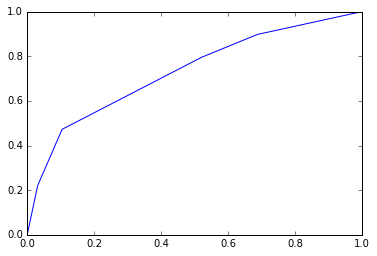

In [101]:
actual = lm.predict(feature) 
proba = lm.predict_proba(feature)
plt.plot(roc_curve(target, proba[:,1])[0], roc_curve(target, proba[:,1])[1])

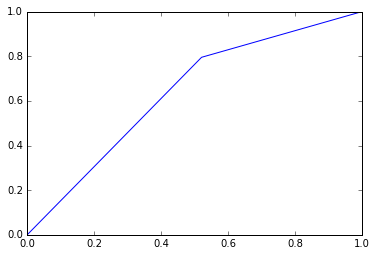

In [100]:
plt.plot(roc_curve(target, actual)[0], roc_curve(target, actual)[1])

In [102]:
roc_auc_score(target, lm.predict(feature))

0.63722112860892388

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [61]:
Senior = df[df['title'].str.contains("Senior", "Sr")]
Manager = df[df['title'].str.contains("Manager")]
#print 'Senior Median Salary', Senior['yearly_salary'].median()
#print 'Manager Median Salary', Manager['yearly_salary'].median()
print 'Senior', Senior['yearly_salary'].describe()
print 'Manager', Manager['yearly_salary'].describe()

Senior count        25.000000
mean     131410.820000
std       34264.206093
min       57500.000000
25%      102498.000000
50%      135000.000000
75%      152500.000000
max      190000.000000
Name: yearly_salary, dtype: float64
Manager count         6.000000
mean     137857.083333
std       61409.297296
min       82329.000000
25%       85578.375000
50%      124906.750000
75%      179375.000000
max      225000.000000
Name: yearly_salary, dtype: float64


In [104]:
lm2 = LogisticRegression()

lm2.fit(Senior[['Austin', 'Chicago', 'New+York', 'San+Francisco', 'Seattle']], Senior['high_salary'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
feature = Senior[['Austin', 'Chicago', 'New+York', 'San+Francisco', 'Seattle']]
print lm.score(feature, Senior['high_salary'])

0.76


In [108]:
print 'Coefficients:', lm2.coef_
print 'Intercept:', lm2.intercept_
print 'Mean:', Senior.high_salary.mean()

Coefficients: [[ 0.27484454  0.46541043 -0.18565566  0.73257502  0.27484454]]
Intercept: [ 1.56201889]
Mean: 0.92


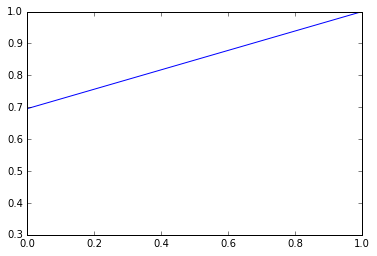

In [109]:
actual = lm2.predict(feature) 
proba = lm2.predict_proba(feature)
plt.plot(roc_curve(Senior['high_salary'], proba[:,1])[0], roc_curve(Senior['high_salary'], proba[:,1])[1])

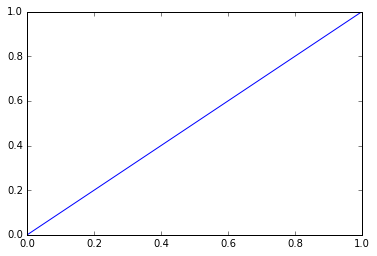

In [110]:
plt.plot(roc_curve(Senior['high_salary'], actual)[0], roc_curve(Senior['high_salary'], actual)[1])

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [79]:
## YOUR CODE HERE

In [80]:
## YOUR CODE HERE

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [81]:
## YOUR CODE HERE

In [82]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?